# Statistical Rethinking 2023
## Lecture 2 - The Garden of Forking Data

### 2.1 - Workflow

1) Define generative model of the sample
2) Define a specific estimand
3) Design a statistical way to produce estimate
4) Test (3) using (1)
5) Analyze sample, summarize

### 2.1.1 - Generative model of the globe

Begin conceptually: How do the variables influence one another?

- p = proportion of water (*estimand)*
- W = water observations
- L = land observations
- N = number of tosses

### 2.1.2 - Define a specific estimand

![](img/1_lec02_the_garden_of_forking_data_1.jpg)

$$
W, L = f(p, N)
$$


### 2.1.3 - Design a statistical way to produce estimate

##### Bayesian Data Analysis

- For each possible explanation of the sample,
- Count all the ways the sample could happen
- Explanations with more ways to produce the sample are more plausible

**For garden of forking data**, this analysis would be:
- For each possible *proportion of water* on the globe,
- Count all the ways the sample of tosses could happen
- Proportion with more ways to prodcue the sample are more plausible 

$$
\text{Ways for $p$ to produce W, L} = (4p)^W \times (4 - 4p)^L
$$


It is just a scaled version of $p^W (1 - p)^L
$

It means, If **$p$** is the chance of a success or win on a single trial, and you have **W** successes and **L** failures in **$W + L$** independent trial, the probability of exactly **W** wins and **L** losses is often written  (up to a **Binomial Coefficient**) as: 

$$
\left(\frac{W}{W+L}\right) p^W (1 - p)^L
$$


**Why the factor of 4?**

When building a discrete grid approximation of $p$, McElreath sometimes uses a small integer “denominator”—for instance, 4—to represent all possible fractions $p$ in increments of 0.25. If:

- $p$ is the fraction representing “Water,”
- then $4p$ is “how many out of 4” are Water,
- and $4 - 4p$ is “how many out of 4” are Land.

So instead of working directly with $p$ and $(1 - p)$, the model is effectively weighting each Water observation by $4p$ and each Land observation by $4(1 - p)$. That’s why you see:

$$(4p)^W \quad \text{and} \quad [\,4(1 - p)\,]^L.$$

It’s just a scaled version of $p^W(1 - p)^L.$



<img src="img/2_lec02_the_garden_of_forking_data_2.jpg" alt="Garden of Forking Data" width="600px" width="300px">

### ************* CODE *************

In [3]:
# Define sample 
sample <- c('W', 'L', 'W', 'W', 'W', 'L', 'W', 'L', 'W')

In [4]:
# Count number of water and land in the sample
W <- sum(sample == 'W')
L <- sum(sample == 'L')
c(W,L)

[1] 6 3

In [5]:
# Possible propotion of water (p)
p <- c(0, 0.25, 0.50, 0.75, 1)
p

[1] 0.00 0.25 0.50 0.75 1.00

In [6]:
# Write function to produce number of ways of sample
# remember formula above
# (4p)^W x (4-4p)^L
# can also be written as:
# (4p)^W x (4(1-p))^L
# we will use sapply function that is explained below

ways <- sapply(p, function(q) (4*q)^W * (4*(1-q))^L )
ways

[1]   0  27 512 729   0

In [7]:
# Calculate probability of proportion
prob <- ways/sum(ways)
prob

[1] 0.00000000 0.02129338 0.40378549 0.57492114 0.00000000

In [8]:
round(prob, 2)

[1] 0.00 0.02 0.40 0.57 0.00

In [9]:
cbind(p, ways, prob=round(prob, 2))

p,ways,prob
0.00,0,0.00
0.25,27,0.02
0.50,512,0.40
0.75,729,0.57
1.00,0,0.00


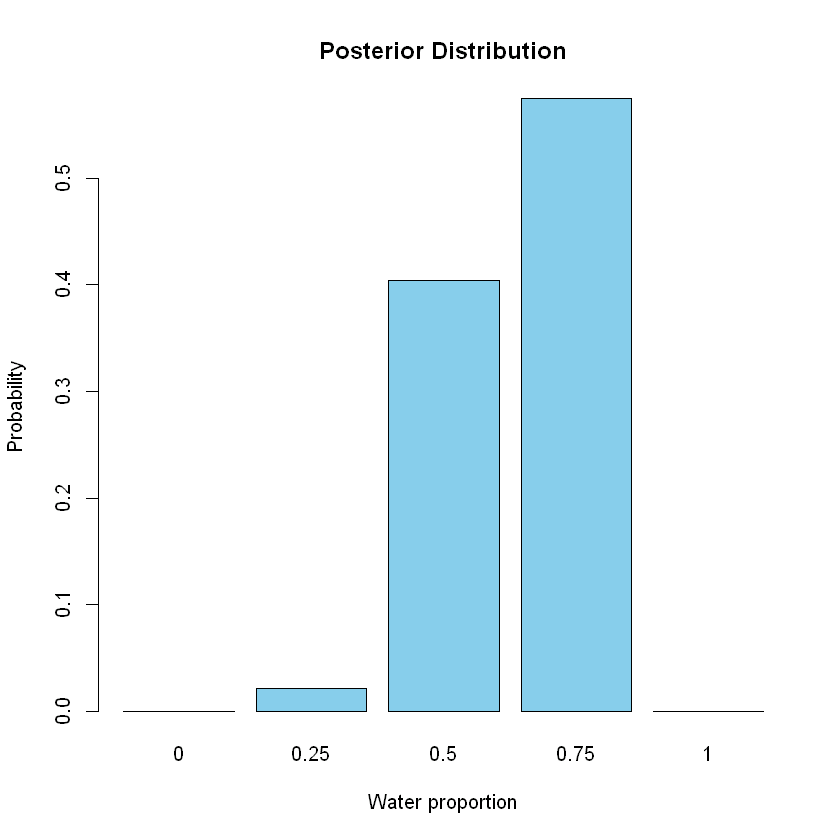

In [10]:
# Create a bar plot
barplot(
  height = prob,
  names.arg = p,
  main = "Posterior Distribution",
  xlab = "Water proportion",
  ylab = "Probability",
  col = "skyblue"
)


#### ==> Explanation of CODE <==
**Working of sapply function**


In [11]:
# for example
result <- sapply(1:5, function(x) x^2)
result

[1]  1  4  9 16 25

### 2.1.4 - Test (3) using (1) 

- *Testing statistical model using generative model*
- *Code a generative simulation*

#### `sample()` Function - General Syntax and Parameters

The `sample()` function in R is used to randomly select elements from a vector. Below is the general syntax and a description of each parameter.

```r
sample(x, size, replace = FALSE, prob = NULL)
# x: A vector of elements from which to sample.
# size: The number of items to select.
# replace: Logical; if TRUE, sampling is done with replacement.
# prob: An optional vector of probability weights for sampling.


In [25]:
# Simulate a function to toss a globe
# Number of tosses: N
# proportion of land water with water: p
# for 75% of land covered with water and tossing the globe for 10 times, following is function
tossing_globe <- function(p=0.75,N=10){
    sample(c('W', 'L'), size=N, prob=c(p, 1-p), replace=TRUE )
}   

In [26]:
tossing_globe()

[1] "W" "W" "W" "W" "W" "L" "W" "W" "W" "W"

In [34]:
# Testing at exteme positions - 100% water
tossing_globe(p=1, N=10)

[1] "W" "W" "W" "W" "W" "W" "W" "W" "W" "W"

In [35]:
# Testing at exteme positions - 100% land
tossing_globe(p=0, N=10)

[1] "L" "L" "L" "L" "L" "L" "L" "L" "L" "L"

In [36]:
# Testing at exteme positions - 50% water
tossing_globe(p=0.5, N=10)

[1] "L" "W" "L" "W" "L" "W" "L" "W" "W" "W"

In [40]:
# Testing - to see if it reutrns half of the values of water, when water porportion is 50%
sum(tossing_globe(p=0.5, N=1e4) == 'W')/1e4

[1] 0.502

In [41]:
# Replication function
replicate(tossing_globe(p=0.70, N=10), n=20)

W,W,L,W,W,W,W,L,W,L,W,W,L,W,W,W,W,L,W,L
W,W,L,W,W,L,W,L,W,W,W,W,L,W,W,W,W,W,W,W
W,W,W,W,L,W,W,W,L,W,L,W,W,L,W,L,L,L,W,L
L,W,W,W,W,W,L,W,W,W,W,W,W,W,W,L,L,W,L,W
W,L,W,L,L,W,L,W,W,W,W,W,W,W,W,W,L,W,W,W
W,W,L,W,L,W,W,W,W,W,W,L,W,W,W,W,W,W,W,W
L,W,L,W,L,W,L,W,W,W,W,L,W,W,L,W,L,W,W,W
W,W,W,W,W,L,L,W,L,W,W,L,W,W,W,L,L,W,W,W
L,W,W,W,W,W,L,L,L,W,L,L,W,L,W,W,L,W,W,L
W,W,W,L,L,W,W,W,W,L,W,W,W,W,L,W,W,W,W,L


## ---- *** ---- ##



## Understanding matrix operations

### Simple Explanation of Matrix Operations in R

A **matrix** in R is like a table or grid with rows and columns. Here’s how you can think about it:

- **Accessing Elements:**  
  Use square brackets `[]` with two parts:  
  - The first part specifies the **row**.  
  - The second part specifies the **column**.

  For example, if you have a matrix called `mat`:
  
  - `mat[i, j]` gives you the element at the i-th row and j-th column.
  - `mat[i, ]` gives you the entire i-th row (all columns).
  - `mat[, j]` gives you the entire j-th column (all rows).

- **Looping Over Rows:**  
  When you want to print or process each row as a whole, you loop over the row indices. For example:

  ```r
  for (i in 1:nrow(mat)) {
    print(mat[i, ])
  }


In [83]:
simulation_data = replicate(tossing_globe(p=0.70, N=10), n=10)
for (i in 1:nrow(simulation_data)) {
  print(simulation_data[i, ])
}

 [1] "W" "W" "W" "W" "W" "W" "W" "W" "W" "L"
 [1] "L" "L" "W" "W" "L" "W" "W" "L" "L" "W"
 [1] "W" "W" "W" "L" "L" "W" "L" "L" "L" "W"
 [1] "L" "W" "W" "W" "W" "L" "W" "W" "W" "W"
 [1] "W" "L" "W" "W" "W" "W" "W" "W" "L" "W"
 [1] "L" "W" "L" "L" "W" "W" "W" "W" "W" "W"
 [1] "W" "L" "W" "W" "W" "W" "W" "L" "L" "L"
 [1] "L" "L" "W" "W" "L" "W" "W" "W" "W" "W"
 [1] "W" "W" "W" "W" "W" "W" "W" "L" "W" "W"
 [1] "W" "W" "W" "L" "W" "W" "L" "W" "L" "W"


In [90]:
simulation_data = replicate(tossing_globe(p=0.70, N=10), n=10)
for (i in 1:nrow(simulation_data)) {
    print(sum(simulation_data[i, ] =='W')/10)
}

[1] 0.8
[1] 0.2
[1] 0.5
[1] 0.5
[1] 0.6
[1] 0.4
[1] 0.6
[1] 0.4
[1] 0.7
[1] 0.3
[1] 0.8
[1] 0.2
[1] 0.5
[1] 0.5
[1] 0.6
[1] 0.4
[1] 0.6
[1] 0.4
[1] 0.9
[1] 0.1


In [59]:
simulation_data = replicate(tossing_globe(p=0.70, N=10), n=10)
mat = matrix(data=simulation_data, nrow=10, ncol=10, byrow=TRUE)
colnames(mat) <- paste("Toss", 1:10, sep = "_")
print(mat)

      Toss_1 Toss_2 Toss_3 Toss_4 Toss_5 Toss_6 Toss_7 Toss_8 Toss_9 Toss_10
 [1,] "L"    "W"    "W"    "L"    "W"    "L"    "L"    "L"    "W"    "W"    
 [2,] "W"    "W"    "W"    "W"    "W"    "W"    "L"    "W"    "L"    "W"    
 [3,] "W"    "W"    "W"    "W"    "W"    "W"    "L"    "W"    "W"    "L"    
 [4,] "W"    "W"    "W"    "L"    "W"    "W"    "W"    "W"    "W"    "W"    
 [5,] "L"    "L"    "W"    "W"    "W"    "W"    "L"    "W"    "W"    "W"    
 [6,] "L"    "W"    "W"    "W"    "L"    "L"    "W"    "W"    "W"    "W"    
 [7,] "W"    "L"    "W"    "W"    "W"    "W"    "W"    "W"    "W"    "L"    
 [8,] "W"    "W"    "L"    "L"    "W"    "W"    "L"    "L"    "L"    "W"    
 [9,] "L"    "W"    "W"    "L"    "W"    "W"    "W"    "W"    "W"    "W"    
[10,] "W"    "L"    "W"    "W"    "L"    "L"    "W"    "L"    "W"    "W"    
